In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
from sklearn import preprocessing

## Data Import and preparation

In [15]:
### Import Data

In [25]:
df_Aba_Vac = pd.read_csv("G:/My Drive/Documents 1/MScA 32007/Assigments/Assigment 2/Vacant_and_Abandoned.csv")

In [26]:
df_Aba_Vac.head()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,Vacant/Abandoned Building,17-06828959,10/11/2017,Front,NaN,Open,NaN,Vacant,False,False,...,ST,60620.0,1168783.112,1853478.039,17.0,6.0,71.0,41.753463,-87.657041,"(41.753462703929, -87.657041377513)"
1,Vacant/Abandoned Building,17-06827096,10/11/2017,Front,NaN,Open,FRONT DOOR,Vacant,False,False,...,AVE,60637.0,1181040.994,1861211.870,20.0,3.0,42.0,41.774412,-87.611883,"(41.774411948175, -87.611883311021)"
2,Vacant/Abandoned Building,17-06818719,10/11/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PL,60628.0,1176047.454,1834969.668,34.0,5.0,49.0,41.702514,-87.630974,"(41.702513512066, -87.630973750337)"
3,Vacant/Abandoned Building,17-06824436,10/11/2017,Rear,NaN,Open,SIDE DOOR,Vacant,True,True,...,AVE,60621.0,1172283.019,1866776.318,20.0,7.0,68.0,41.789879,-87.643825,"(41.789878552302, -87.643824817919)"
4,Vacant/Abandoned Building,17-06826684,10/11/2017,Front,NaN,Open,FRONT DOOR,Vacant,False,True,...,ST,60628.0,1175546.130,1841922.444,21.0,5.0,49.0,41.721604,-87.632602,"(41.721604113589, -87.63260226787)"


In [16]:
# Data Preparation: Selecting 5 Primary Values and cleaning

In [12]:
df_Aba_Vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65119 entries, 0 to 65118
Data columns (total 23 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   SERVICE REQUEST TYPE                                                   65119 non-null  object 
 1   SERVICE REQUEST NUMBER                                                 65119 non-null  object 
 2   DATE SERVICE REQUEST WAS RECEIVED                                      65119 non-null  object 
 3   LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  56345 non-null  object 
 4   IS THE BUILDING DANGEROUS OR HAZARDOUS?                                0 non-null      float64
 5   IS BUILDING OPEN OR BOARDED?                                           56863 non-null  object 
 6   IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                     34362 non-null 

In [14]:
num_missing = df_Aba_Vac.isnull().sum()
num_missing/len(df_Aba_Vac)*100

SERVICE REQUEST TYPE                                                       0.000000
SERVICE REQUEST NUMBER                                                     0.000000
DATE SERVICE REQUEST WAS RECEIVED                                          0.000000
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).     13.473794
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  100.000000
IS BUILDING OPEN OR BOARDED?                                              12.678327
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                        47.231991
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                             12.666042
IS THE BUILDING VACANT DUE TO FIRE?                                       14.005129
ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)                     13.126737
ADDRESS STREET NUMBER                                                      0.001536
ADDRESS STREET DIRECTION                                                   0

In [ ]:
## Changing Null Values to 'Unknown' from Orimary 5

In [19]:
df_Aba_Vac['IS BUILDING OPEN OR BOARDED?'] = df_Aba_Vac['IS BUILDING OPEN OR BOARDED?'].fillna('Unknown')
df_Aba_Vac['IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?'] = df_Aba_Vac['IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?'].fillna('Unknown')
df_Aba_Vac['IS THE BUILDING VACANT DUE TO FIRE?'] = df_Aba_Vac['IS THE BUILDING VACANT DUE TO FIRE?'].fillna('Unknown')
df_Aba_Vac['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'] = df_Aba_Vac['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'].fillna('Unknown')
df_Aba_Vac.head()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,Vacant/Abandoned Building,17-06828959,10/11/2017,Front,NaN,Open,NaN,Vacant,False,False,...,ST,60620.0,1168783.112,1853478.039,17.0,6.0,71.0,41.753463,-87.657041,"(41.753462703929, -87.657041377513)"
1,Vacant/Abandoned Building,17-06827096,10/11/2017,Front,NaN,Open,FRONT DOOR,Vacant,False,False,...,AVE,60637.0,1181040.994,1861211.870,20.0,3.0,42.0,41.774412,-87.611883,"(41.774411948175, -87.611883311021)"
2,Vacant/Abandoned Building,17-06818719,10/11/2017,NaN,NaN,Unknown,NaN,Unknown,Unknown,Unknown,...,PL,60628.0,1176047.454,1834969.668,34.0,5.0,49.0,41.702514,-87.630974,"(41.702513512066, -87.630973750337)"
3,Vacant/Abandoned Building,17-06824436,10/11/2017,Rear,NaN,Open,SIDE DOOR,Vacant,True,True,...,AVE,60621.0,1172283.019,1866776.318,20.0,7.0,68.0,41.789879,-87.643825,"(41.789878552302, -87.643824817919)"
4,Vacant/Abandoned Building,17-06826684,10/11/2017,Front,NaN,Open,FRONT DOOR,Vacant,False,True,...,ST,60628.0,1175546.130,1841922.444,21.0,5.0,49.0,41.721604,-87.632602,"(41.721604113589, -87.63260226787)"


In [ ]:
## Changing Date of service to actual Date attribute

In [28]:
df_Aba_Vac['DATE SERVICE REQUEST WAS RECEIVED'] = pd.to_datetime(df_Aba_Vac['DATE SERVICE REQUEST WAS RECEIVED'])

## EDA

In [23]:
## Looking into Building details based of Primary 5 attributes

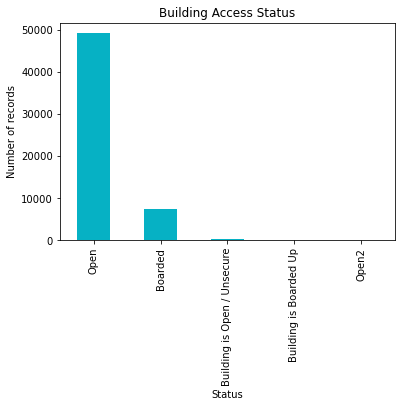

In [69]:
df_Aba_Vac['IS BUILDING OPEN OR BOARDED?'].value_counts().plot(kind='bar', color = '#06b1c4')
plt.title("Building Access Status")
plt.ylabel('Number of records')
plt.xlabel('Status');

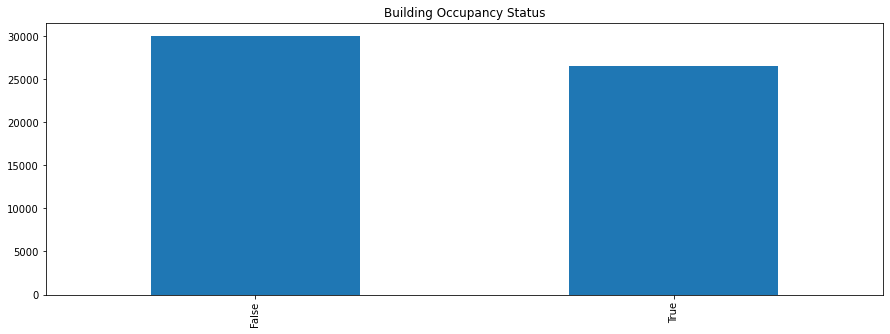

In [53]:
df_Aba_Vac['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Building Occupancy Status");

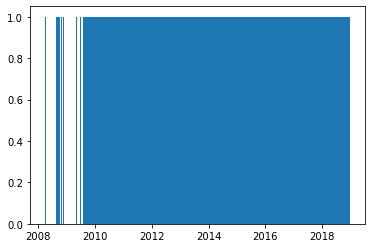

In [33]:
x = df_Aba_Vac['DATE SERVICE REQUEST WAS RECEIVED']
y = df_Aba_Vac['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)']

ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.xaxis_date()

plt.show()

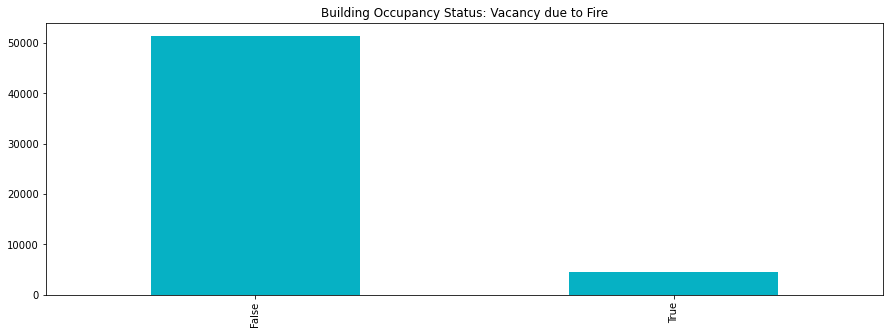

In [68]:
df_Aba_Vac['IS THE BUILDING VACANT DUE TO FIRE?'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5), color = '#06b1c4')
plt.title("Building Occupancy Status: Vacancy due to Fire");

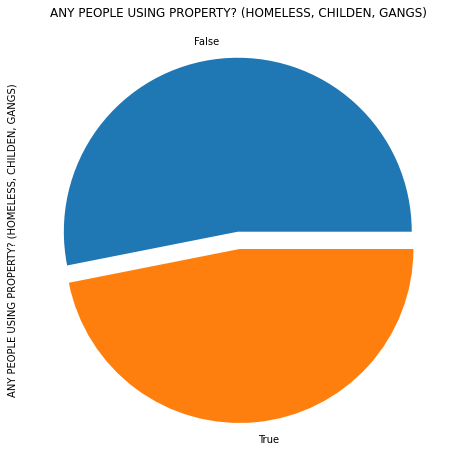

In [73]:
df_Aba_Vac['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'].value_counts().plot.pie(explode=[0.05, 0.05], shadow=False, figsize=(8,8),)
plt.title('ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)')
plt.show()

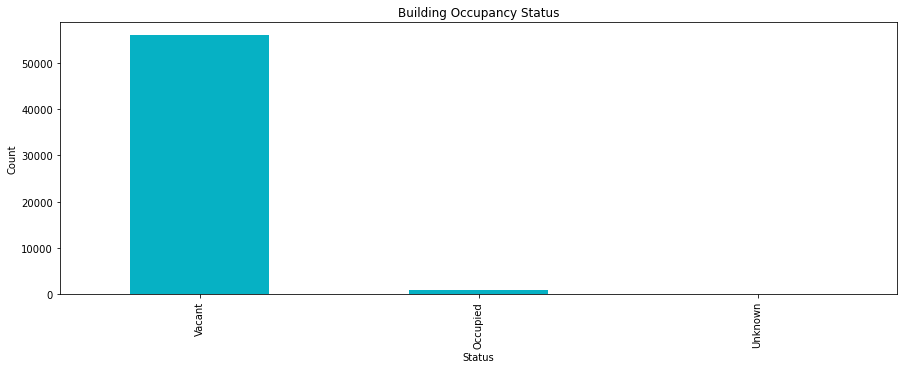

In [65]:
df_Aba_Vac['IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5) ,color = '#06b1c4')
plt.title("Building Occupancy Status")
plt.ylabel('Count')
plt.xlabel('Status');

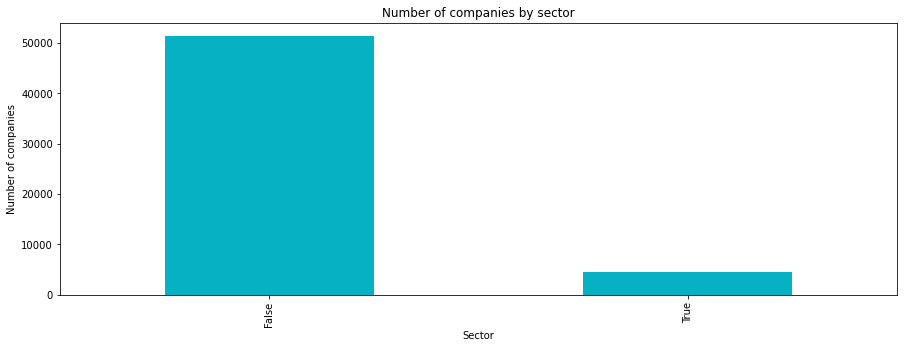

In [63]:
df_Aba_Vac['IS THE BUILDING VACANT DUE TO FIRE?'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5), color = '#06b1c4')
plt.title("Number of companies by sector")
plt.ylabel('Number of companies')
plt.xlabel('Sector');

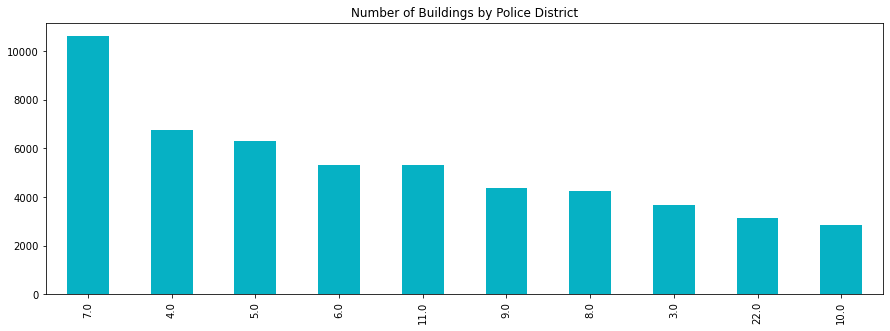

In [62]:
df_Aba_Vac['Police District'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5), color = '#06b1c4')
plt.title("Number of Buildings by Police District");

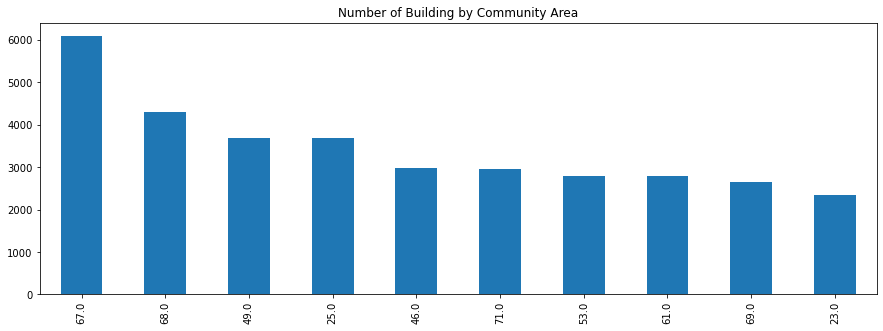

In [58]:
df_Aba_Vac['Community Area'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of Building by Community Area");

<AxesSubplot:>

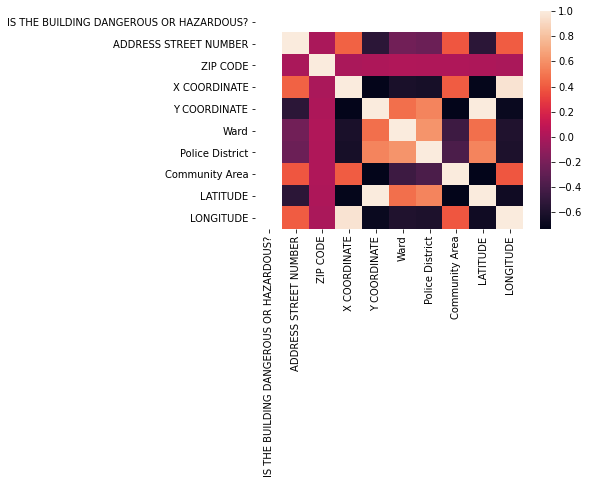

In [45]:
corr = df_Aba_Vac.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)